# Overview plot [^download]

[^download]: This notebook can be downloaded as **{nb-download}`example_overview.ipynb`**.

This very simple example shows you how to make an overview plot provided a yaml configuration file and a result csv.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from post_processing.dataclass.data_aplose import DataAplose

yaml_file = Path(r"_static/APOCADO_yaml.yml")
data = DataAplose.from_yaml(file=yaml_file)

The `DataAplose` object has informations about the loaded result csv

In [2]:
print(f"{' FILE ':#^60}")
print(f"{'Begin:':<30}{str(data.begin):>30}")
print(f"{'End:':<30}{str(data.end):>30}")
print(f"{'Annotators:':<30}{str((', ').join(data.annotators)):>30}")
print(f"{'Labels:':<30}{str((', ').join(data.labels)):>30}")
print(f"{'Dataset:':<30}{str((', ').join(data.dataset)):>30}")

########################### FILE ###########################
Begin:                             2022-07-07 00:00:00+02:00
End:                               2022-07-07 11:49:00+02:00
Annotators:                           annotator1, annotator2
Labels:                                 buzz, click, whistle
Dataset:                                            dataset1


To create an overview plot of `data`, use the `post_processing.dataclass.data_aplose.DataAplose.overview` class method.

The plot provides the number of annotation per label and per annotator.

[INFO] - 25/09/04 13:46:47
############### Overview ###############

             annotator1  annotator2
annotation                        
buzz              42.0         NaN
click             81.0         NaN
whistle           22.0         2.0



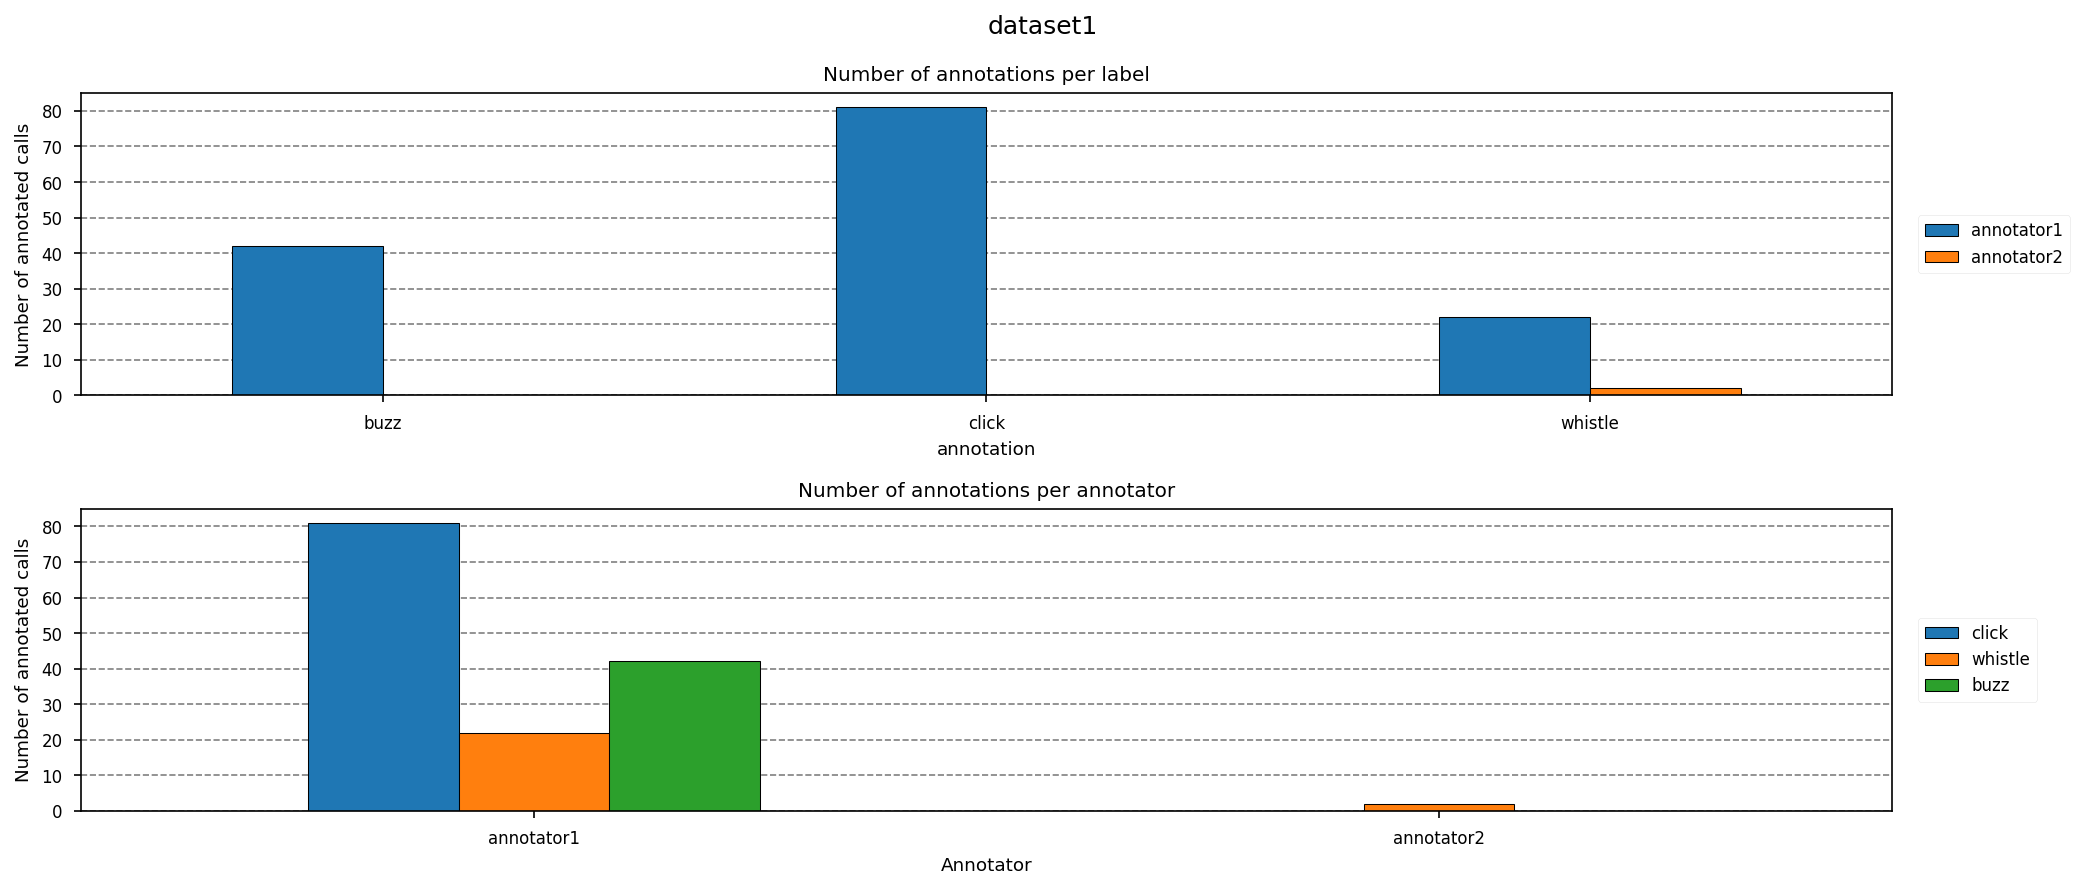

In [3]:
data.overview()
plt.tight_layout()
plt.show()